<a href="https://colab.research.google.com/github/ritweekraj2802/Disney-Studio-Income-Analysis/blob/main/Project_3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <center> Disney Studio Income Analysis

## Import Libraries

In [17]:
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')

# display multiple output in single cell
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Task 1: Data Exploration

Checking Null Values , release_date into datatime , best & worst total gross

In [18]:
%time train = pd.read_csv('disney_movies.csv')

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 30.8 ms


In [19]:
#Let's have a look at sample data.
train.head(n=10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574


In [20]:
#Lets have some statastics of data
print("Shape of data is ")
train.shape
print('The total number of movies are',train.shape[0])

Shape of data is 


(579, 6)

The total number of movies are 579


In [21]:
#Lets check information of dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [22]:
#About dataset
train.describe(include='all')

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
count,579,579,562,523,5.790000e+02,5.790000e+02
unique,573,553,12,5,NaN,NaN
top,The Jungle Book,1997-12-25,Comedy,PG,NaN,NaN
freq,3,3,182,187,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.470179e+07,1.187625e+08
std,NaN,NaN,NaN,NaN,9.301301e+07,2.860853e+08
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,1.278886e+07,2.274123e+07
50%,NaN,NaN,NaN,NaN,3.070245e+07,5.515978e+07
75%,NaN,NaN,NaN,NaN,7.570903e+07,1.192020e+08


In [23]:
#Let's check missing/null value in train data.
# checking NULL value

train.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [28]:
## Converting release_date to date type:
train['release_date'] = pd.to_datetime(train['release_date'])

In [29]:
# Let's create an column named year to visualize later
train['year'] = train['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]

In [31]:
train.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
mpaa_rating                         object
total_gross                          int64
inflation_adjusted_gross             int64
decade                              object
year                                object
dtype: object

In [33]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
total_gross,579.0,6.470179e+07,9.301301e+07,0.0,12788864.0,30702446.0,75709033.0,9.366622e+08
inflation_adjusted_gross,579.0,1.187625e+08,2.860853e+08,0.0,22741232.0,55159783.0,119202000.0,5.228953e+09


In [34]:
#The best and worst gross
print('the best total gross', train['total_gross'].max(),'\nThe worse total gross:', train['total_gross'].min())

the best total gross 936662225 
The worse total gross: 0


## Task 2: Visualize Year Distribution Plot

In [45]:
import plotly.express as px
import re

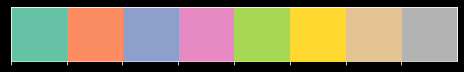

In [46]:
color_pallet = sns.color_palette(palette='Set2')
sns.palplot(color_pallet)
plt.show()

<Figure size 864x576 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 1.0, 'Disney movies per year')

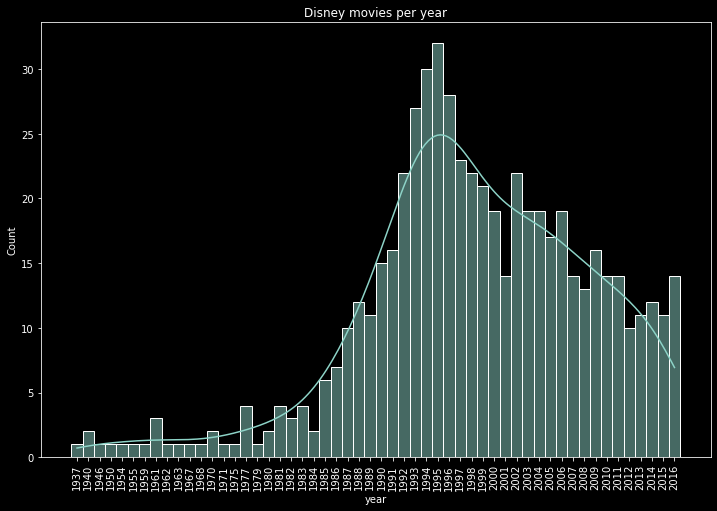

In [47]:
#Analysing number per year
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('Disney movies per year')
sns.histplot(train['year'], kde=True)

In [50]:
#The dataset contains some null values in genre and mpaa_rating which I am going to fill as 'NaN'
train = train.fillna("NaN")

In [51]:
#Visualization of trends using variable release_date

fig = px.scatter(train, x='release_date', y='total_gross',template='plotly_dark', title='Which genre grossed more over the years?', color='genre')
fig.data[0].line.color = 'limegreen'
fig.show()

In [ ]:
#The first movie produced by Disney was a musical which was classic 'Snow White and Seven dwarfs'
#we can see the frequency of movies is increasing with year
#Total Gross of movies is also increasing with year
#Another interesting insight is the popularity of genre changed over time so we can further use the decade variable for further analysis

In [52]:
fig = px.scatter(train, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='Which genre grossed more after inflation over the years?',color='genre')
fig.data[0].line.color = 'limegreen'
fig.show()

In [ ]:
#After inflation of gross income of movies that were released before has increased because of that 
#the movie 'Snow White and Seven Dwarf' became Disney's most valuable movie in term of gross income 
#till date even avengers endgame don't come close

In [53]:
fig = px.scatter(train, x='release_date', y="total_gross",template='plotly_dark',title='Which MPAA-rated movie grossed more over the years?',color='mpaa_rating')
fig.data[0].line.color = 'limegreen'
fig.show()

In [54]:
fig = px.scatter(train, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='Which MPAA-rated movie grossed more after inflation over the years?',color='mpaa_rating')
fig.data[0].line.color = 'limegreen'
fig.show()

In [55]:
#We can see similar trends in MPAA rating early Disney movies were used to be G 
#rated but recent ones are mostly PG and PG-13 rated
#because of inflation in the gross income of movie early movie that was rated G 
#grossed more than current PG or PG-13 rated movies

Text(0.5, 1.0, '<1950')

Text(0.5, 1.0, '1950-1960')

Text(0.5, 1.0, '1960-1970')

Text(0.5, 1.0, '1970-1980')

Text(0.5, 1.0, '1980-1990')

Text(0.5, 1.0, '1990-2000')

Text(0.5, 1.0, '2000-2010')

Text(0.5, 1.0, '2010-2020')

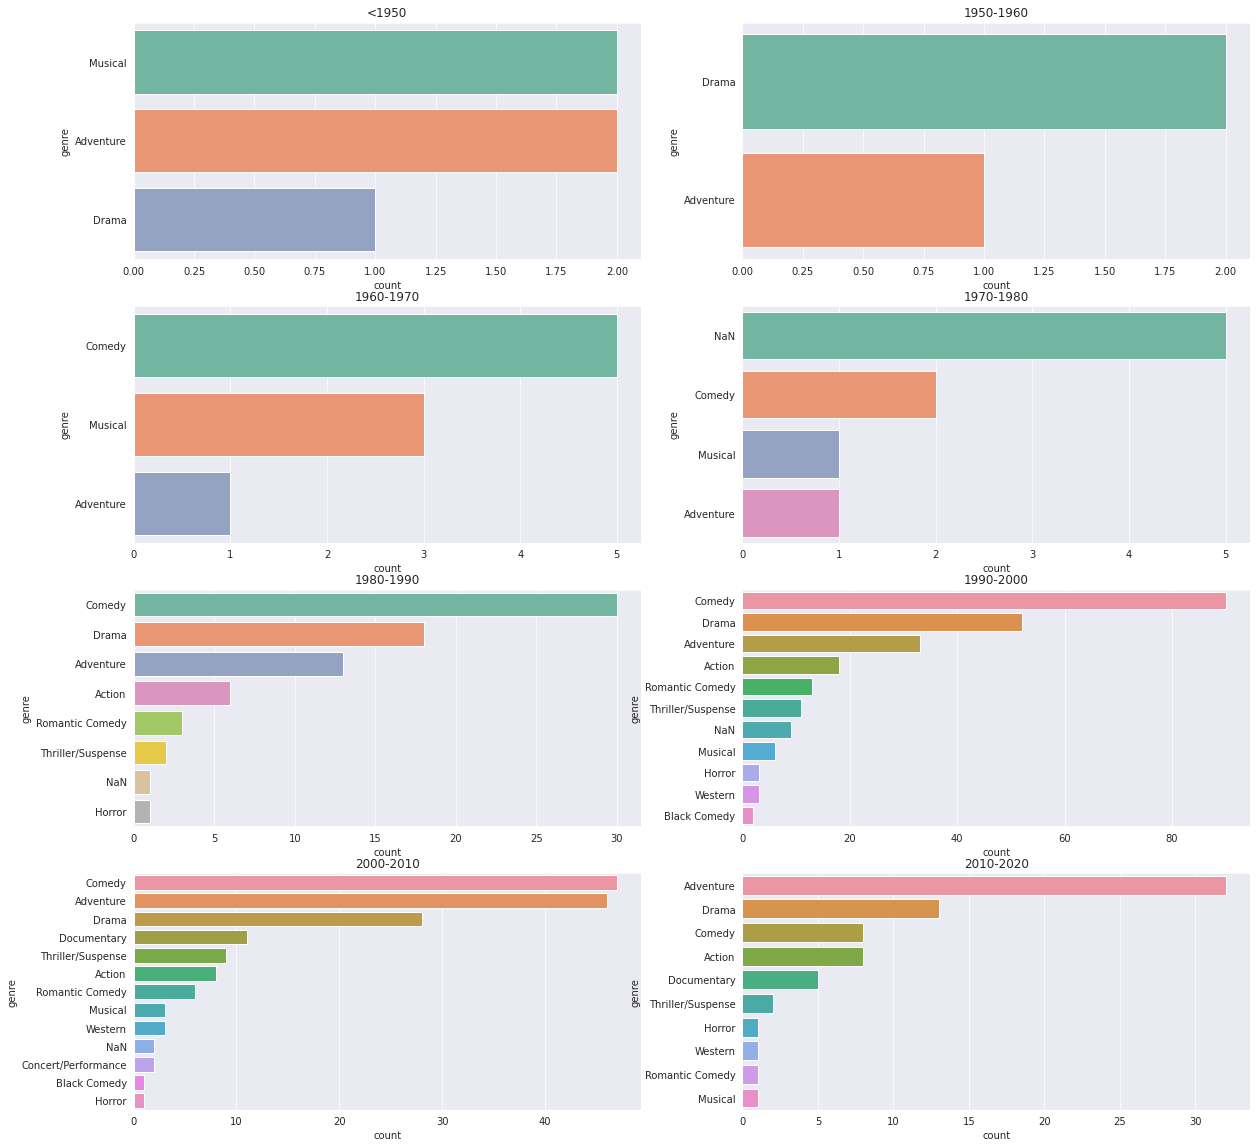

In [56]:
#Let's use the Decade variable for further trend analysis
decade_lis =  train['decade'].unique()
sns.set_style('darkgrid')
fig,axes = plt.subplots(4,2,figsize=(20,20))
axes = axes.flatten()
sns.set_palette('Set2')
for i in range(len(decade_lis)):
    ax = sns.countplot(y='genre',data=train[train['decade']==decade_lis[i]],ax=axes[i],order=train[train['decade']==decade_lis[i]]['genre'].value_counts().index)
    ax.set_title(decade_lis[i])
    fig.show()
plt.show()

In [ ]:
#seems like in different decades Disney focused on making movies from different genres
#from 1980-2010 they mostly focused on comedy movies even though adventure movies 
#performed much better from 2010 onwards it's looked like they noticed and started to 
#focus more on the adventure genre

## Task 3: Does Movies Income Decreased or Increased?

In [57]:
year_income = train.groupby('year').sum()

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'disney movies income')

Text(0.5, 0, 'year')

Text(0, 0.5, 'income')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

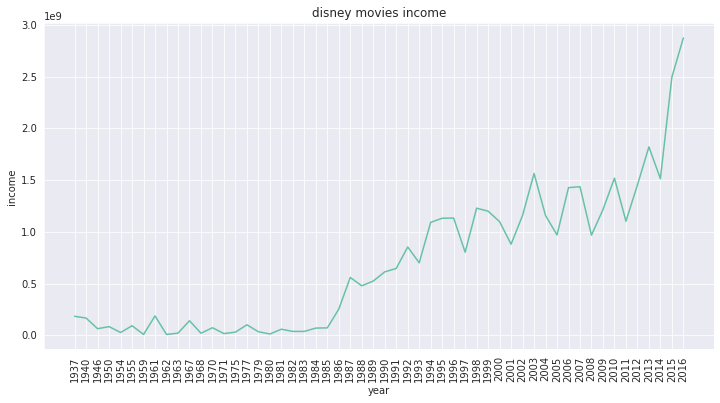

In [58]:
plt.figure(figsize=(12, 6))
plt.title('disney movies income')
plt.xlabel('year')
plt.ylabel('income')
plt.xticks(rotation=90)
sns.lineplot(x=year_income.index, y=year_income['total_gross'])

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'disney movies income adjusted')

Text(0.5, 0, 'year')

Text(0, 0.5, 'inflation adjusted income')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

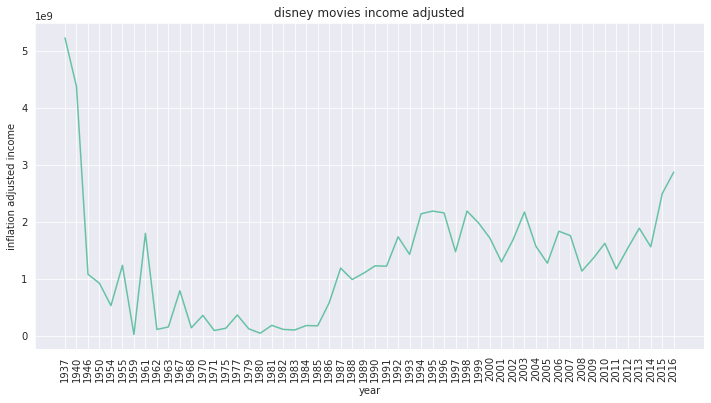

In [59]:
plt.figure(figsize=(12, 6))
plt.title('disney movies income adjusted')
plt.xlabel('year')
plt.ylabel('inflation adjusted income')
plt.xticks(rotation=90)
sns.lineplot(x=year_income.index, y=year_income['inflation_adjusted_gross'])

## Task 4: Describe the total counts of Genres

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Disney movies genres')

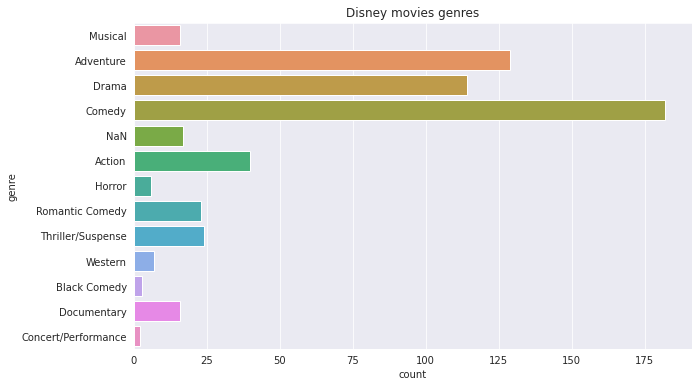

In [61]:
plt.figure(figsize=(10, 6))
plt.title('Disney movies genres')
sns.countplot(y='genre', data=train)